# Exploratory Data Analysis (EDA)

# Project - 1 General EDA

### 1.Dataset Selection

#### The "Global Superstore" dataset consists of essential business metrics like Sales, Profit, Region, and Product Categories. This dataset is ideal for exploring sales trends, profitability, and market behavior across different regions and categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Global_Superstore.csv",encoding="ISO-8859-1")

In [2]:
print(df.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

### 2. Data Handling and Cleaning

In [3]:
print(df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


#### Missing values are handled by filling numerical data with appropriate measures and removing rows or columns with too many missing values to maintain data quality.

In [4]:
df.fillna(df.mean(), inplace=True)
df.dropna(axis=0, thresh=len(df.columns) * 0.5, inplace=True)  
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


C:\Users\charitha\AppData\Local\Temp\ipykernel_25144\794144910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [5]:
df.drop_duplicates(inplace=True)

#### Outliers are detected using the Z-score method, and any data points with a Z-score above 3 are removed to keep the dataset balanced and free from extreme values.

In [6]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

### 3. Statistical Analysis:

#### These commands provide key statistical insights: describe() summarizes numerical data, mean() gives the average, median() shows the middle value, std() calculates standard deviation, and var() measures variance, helping understand data distribution and spread.

In [7]:
print(df.describe())  
print(df.mean()) 
print(df.median()) 
print(df.std())  
print(df.var())

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  46806.000000  46806.000000  46806.000000  46806.000000  46806.000000   
mean   25184.169017  56075.901139    182.669745      3.280520      0.142451   
std    15011.449135  11057.211780    254.685404      2.024193      0.208989   
min        1.000000  13021.000000      0.852000      1.000000      0.000000   
25%    12162.250000  55190.379428     30.210000      2.000000      0.000000   
50%    24574.500000  55190.379428     79.960000      3.000000      0.000000   
75%    38544.750000  55190.379428    221.328000      4.000000      0.200000   
max    51290.000000  97504.000000   1708.140000     10.000000      0.700000   

             Profit  Shipping Cost  
count  46806.000000   46806.000000  
mean      20.199419      18.683993  
std       82.745837      28.585690  
min     -493.320000       0.000000  
25%        0.000000       2.560000  
50%        8.640000       7.320000  
75%       32.880000      21.4

C:\Users\charitha\AppData\Local\Temp\ipykernel_25144\688431754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
C:\Users\charitha\AppData\Local\Temp\ipykernel_25144\688431754.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())
C:\Users\charitha\AppData\Local\Temp\ipykernel_25144\688431754.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())
C:\Users\charitha\AppData\Local\Temp\ipykernel_25144\688431754.py:5: FutureWarning: Dropping 

#### The mean and median of numerical features are calculated to understand the central tendency. A bar chart visually compares these values across different columns for better interpretation.

<Figure size 1200x600 with 0 Axes>

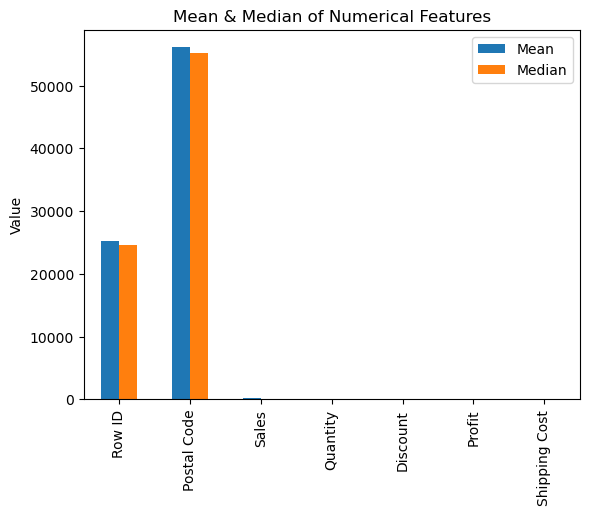

In [8]:
num_cols = df.select_dtypes(include=[np.number])
stats_df = pd.DataFrame({
    "Mean": num_cols.mean(),
    "Median": num_cols.median()
})
plt.figure(figsize=(12, 6))
stats_df[["Mean", "Median"]].plot(kind="bar")
plt.title("Mean & Median of Numerical Features")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

#### A correlation matrix is calculated to show relationships between numerical variables. It helps identify positive or negative correlations, revealing how features influence each other.

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.060158 -0.080979 -0.211053  0.091706 -0.040848   
Postal Code    0.060158     1.000000  0.001148  0.018538 -0.042565  0.008307   
Sales         -0.080979     0.001148  1.000000  0.292007 -0.119923  0.431352   
Quantity      -0.211053     0.018538  0.292007  1.000000 -0.028162  0.107512   
Discount       0.091706    -0.042565 -0.119923 -0.028162  1.000000 -0.453304   
Profit        -0.040848     0.008307  0.431352  0.107512 -0.453304  1.000000   
Shipping Cost -0.069672     0.000734  0.811216  0.246215 -0.104228  0.357693   

               Shipping Cost  
Row ID             -0.069672  
Postal Code         0.000734  
Sales               0.811216  
Quantity            0.246215  
Discount           -0.104228  
Profit              0.357693  
Shipping Cost       1.000000  


### 4. Data Visualization:

#### Histograms are plotted to visualize the distribution of numerical features, helping identify patterns, skewness, and the spread of data.

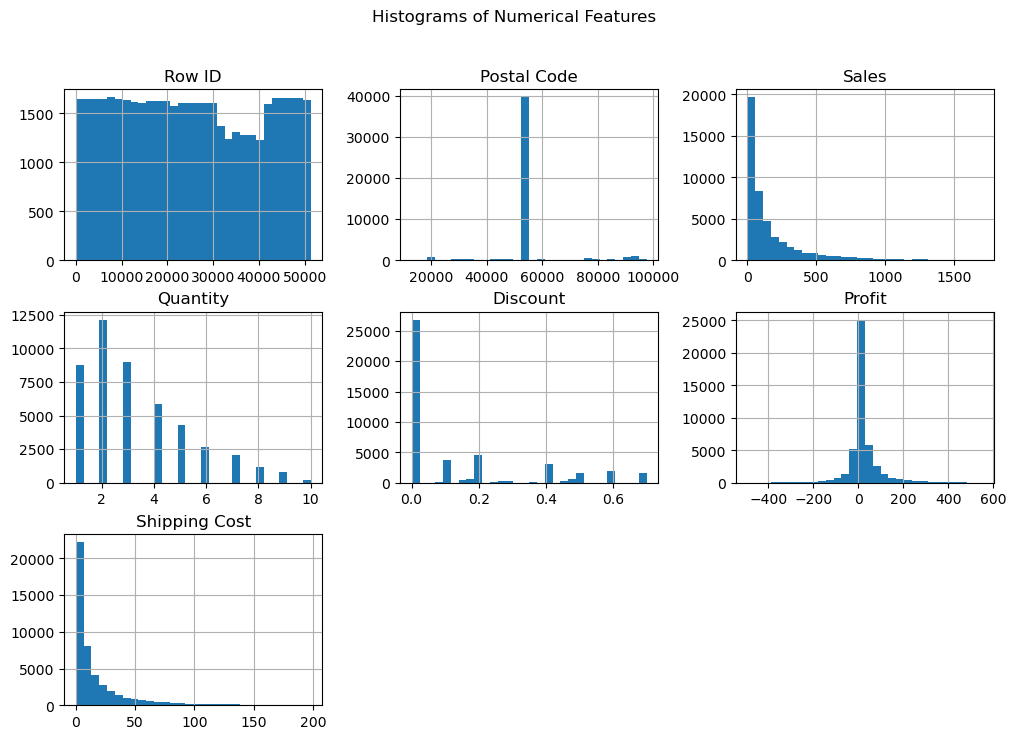

In [10]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

#### A boxplot is used to visualize the spread and outliers in numerical features, helping detect extreme values and understand data distribution.

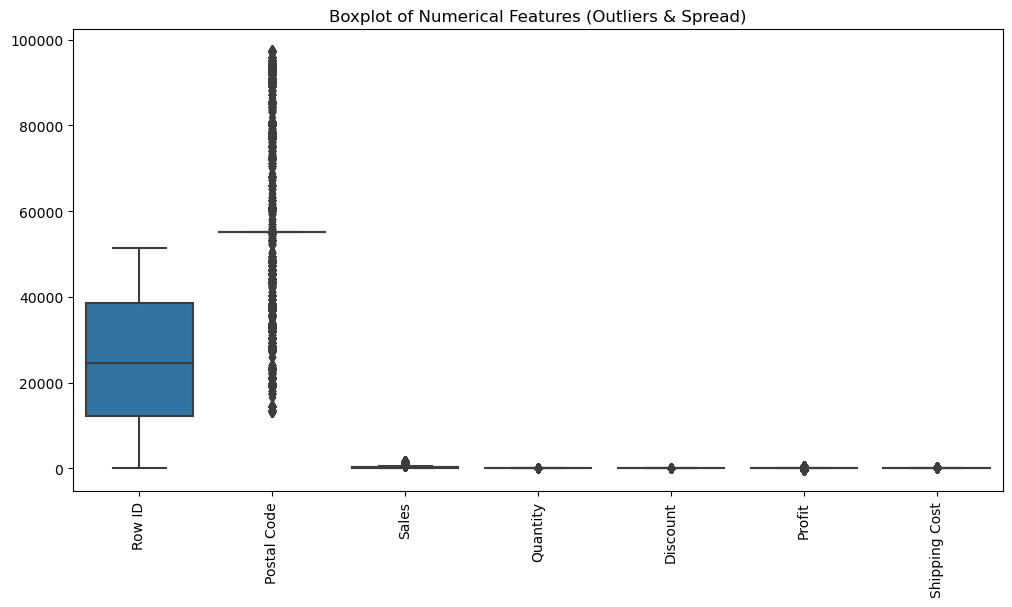

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[float, int]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Outliers & Spread)")
plt.show()

#### A heatmap visually represents the correlation matrix, showing relationships between numerical features. Darker or lighter shades indicate stronger positive or negative correlations.

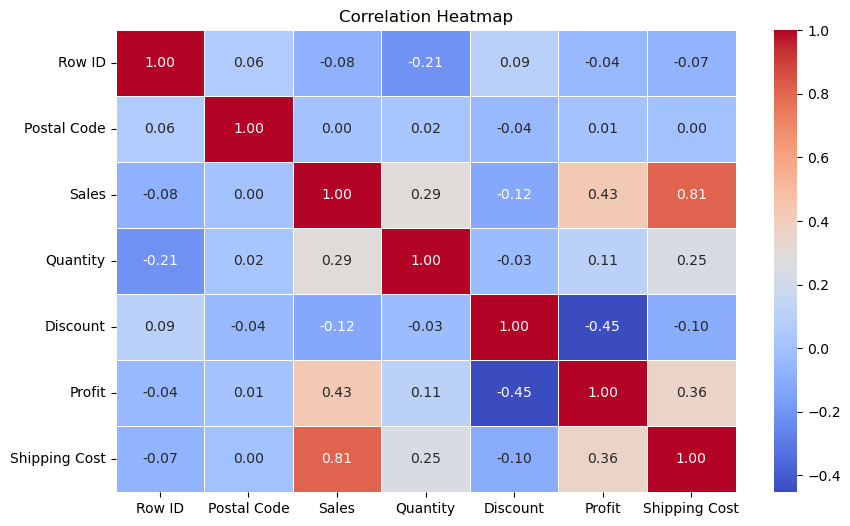

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Pairplots display scatter plots for numerical features, helping visualize relationships and trends between variables.

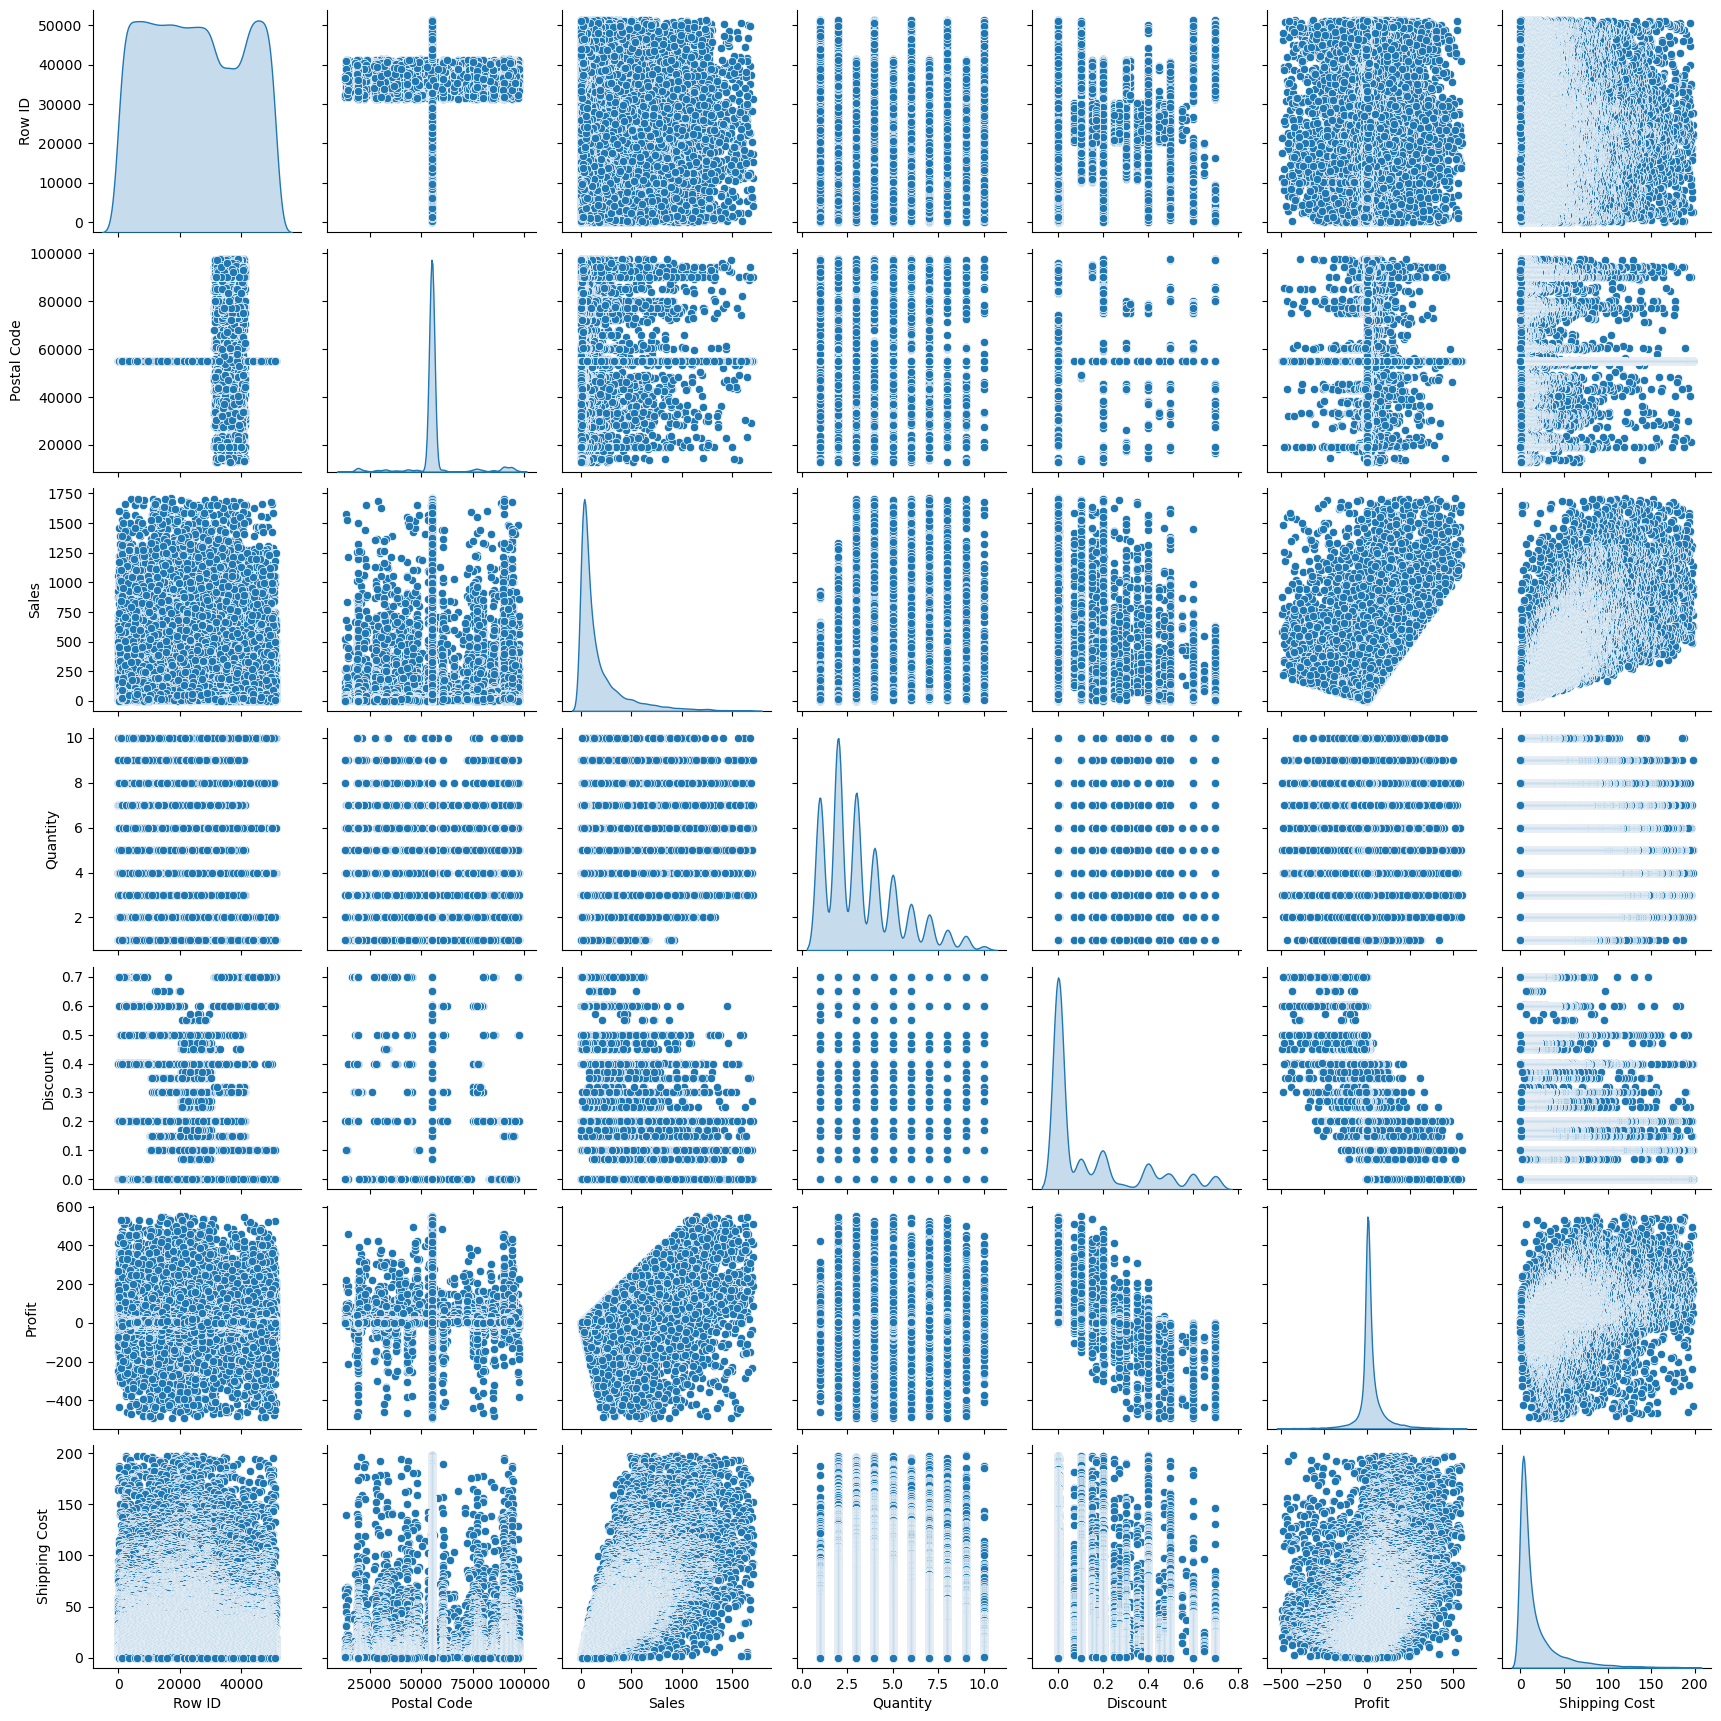

In [13]:
sns.pairplot(df.select_dtypes(include=[float, int]), diag_kind="kde")
plt.show()

#### A pie chart is used to show the distribution of different categories, displaying their proportion in the dataset with percentage labels.

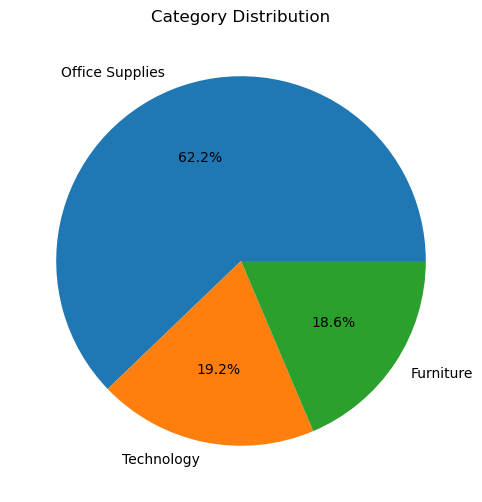

In [14]:
df["Category"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.title("Category Distribution")
plt.ylabel("")  
plt.show()

# Project - 2 Sales Performance Analysis

### 1. Dealing with Dataset

#### To read a sales dataset with proper encoding to handle special characters and displays the first few rows. 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("sales_data.csv",encoding="ISO-8859-1")
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

#### The dataset was inspected for its structure, data types, and missing values to assess its quality. This helps ensure proper formatting and identify any necessary data cleaning steps before analysis.

In [16]:
print(df.shape)

(9994, 21)


In [17]:
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [18]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### 2. Data Cleaning

#### The dataset is cleaned by removing duplicates and filling missing Profit values with the median and Discount with the mean. Date columns are converted to datetime format for accurate time-based analysis.

In [19]:
df=df.drop_duplicates()

In [20]:
df['Profit'].fillna(df['Profit'].median(), inplace=True)
df['Discount'].fillna(df['Discount'].mean(), inplace=True)

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\charitha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-04-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\charitha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-11-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\charitha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-05-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\charitha\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-08-2014' in DD/MM/YYYY format. Provide form

### 3. Exploratory Data Analysis

#### The analysis identifies sales trends over time, revealing patterns, fluctuations, and peak periods for better business insights.

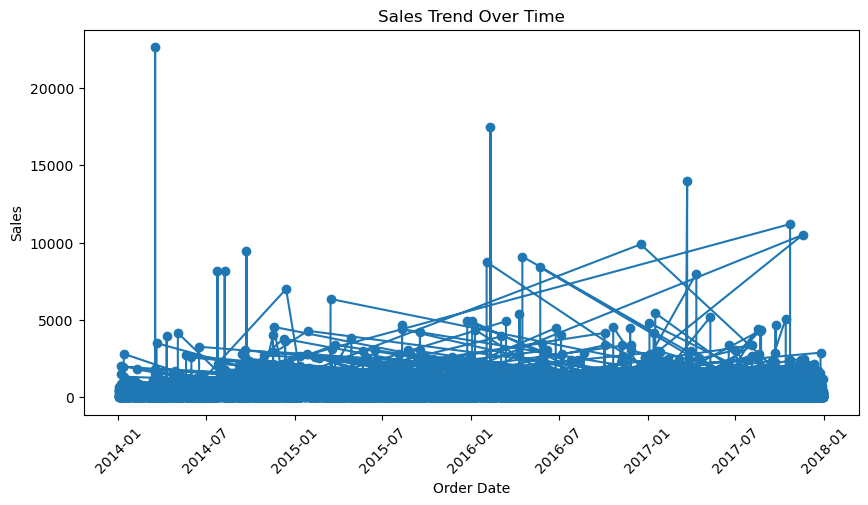

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df['Order Date'], df['Sales'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

#### The scatter plot shows the relationship between sales and profit, highlighting trends and category-wise contributions.

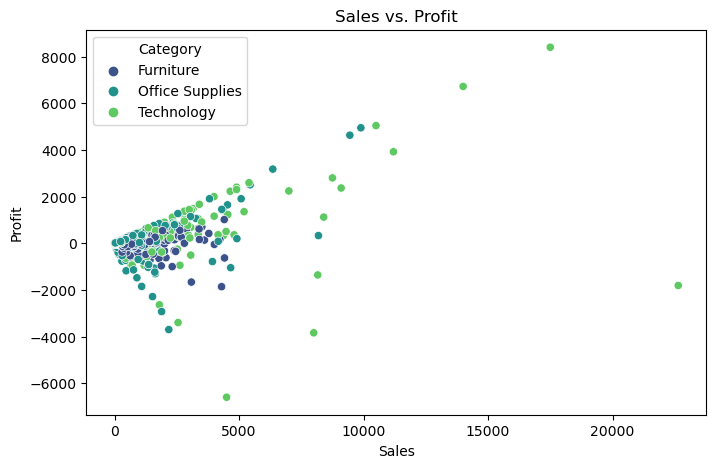

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=df['Category'], palette='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')
plt.legend(title='Category')
plt.show()

#### Bar and pie charts were used to analyze total sales by region and category distribution. These visualizations highlight top-performing regions and major sales-contributing categories.

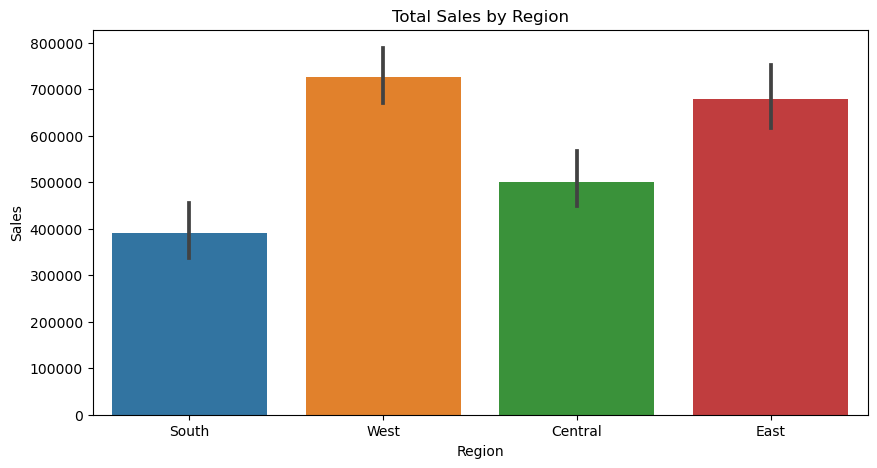

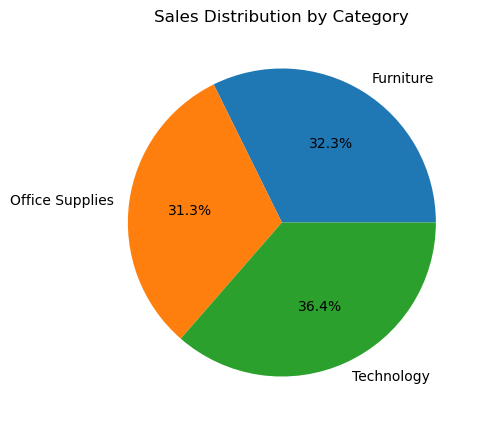

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Region'], y=df['Sales'], estimator=np.sum)
plt.title('Total Sales by Region')
plt.show()
plt.figure(figsize=(10, 5))
df.groupby("Category")["Sales"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

### 4. Predictive Modeling

#### A linear regression model was built to predict sales using profit and discount. Its accuracy was assessed using MSE and R² Score. 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Profit', 'Discount']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 700271.8880636953
R² Score: -0.18549666591248481


#### A correlation heatmap was used to analyze relationships between sales, profit, and discount. It highlights positive or negative correlations, helping identify key influencing factors.

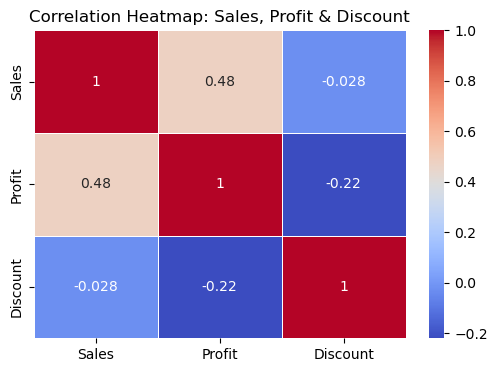

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Sales, Profit & Discount")
plt.show()

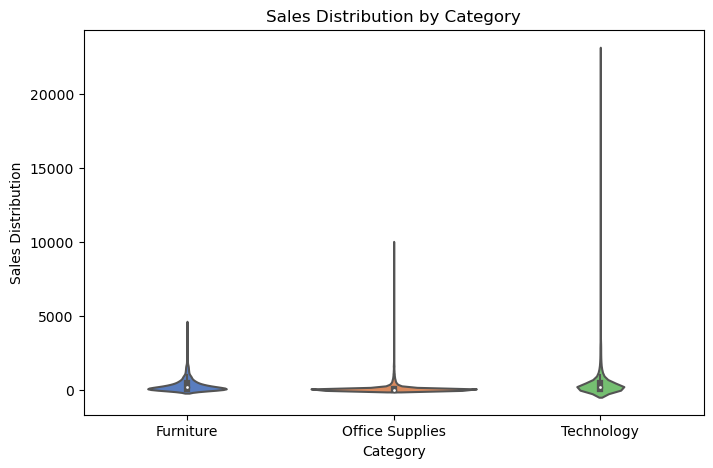

In [27]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Category'], y=df['Sales'], palette="muted")
plt.xlabel("Category")
plt.ylabel("Sales Distribution")
plt.title("Sales Distribution by Category")
plt.show()

#### The sales distribution is visualized using a sunburst chart, showing a hierarchical breakdown by region and category. It highlights top-performing areas and key product categories.

In [28]:
import plotly.express as px
sunburst_data = df.groupby(["Region", "Category"])["Sales"].sum().reset_index()
fig = px.sunburst(sunburst_data, path=["Region", "Category"], values="Sales", title="Regional & Category Sales Breakdown")
fig.show()